In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

out of 20 purchases 4 are returned, calculate population confidence intervals

In [75]:
df = pd.DataFrame({'Not_returned':[16], 'Returned':[4]}, index = ['Purchases'])

In [76]:
df

,Not_returned,Returned
Purchases,16,4


compute the point estimate of the returned goods

In [77]:
returned_ratio = 4/20
returned_ratio

0.2

extract the data from the data frame

In [113]:
returned = df.loc['Purchases', 'Returned' ]
not_returned = df.loc['Purchases','Not_returned']

In [120]:
sample_size = 20
n_permutations = 1000

conduct permutation test, resample with replacement due to small sample size

In [123]:
def permutation_with_replacement(returned_count, not_returned_count, sample_size, n_permutations):
    pool = np.concatenate([np.ones(returned_count), np.zeros(not_returned_count)])
    np.random.shuffle(pool)
    resampled = np.random.choice(pool, size=(n_permutations, sample_size), replace=True)
    resampled_prop = np.mean(resampled, axis=1)
    return resampled_prop

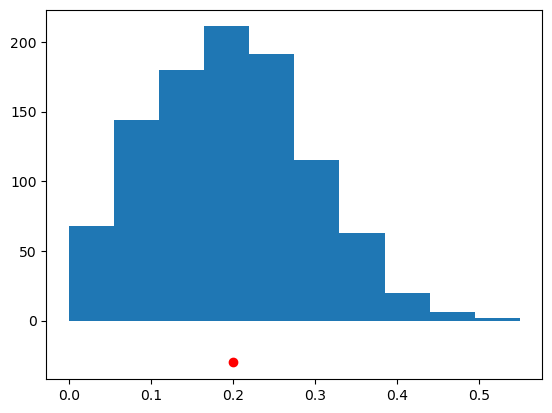

In [124]:
resampled_proportions = permutation_with_replacement(returned, not_returned, sample_size, n_permutations)
plt.hist(resampled_proportions)
plt.scatter(returned_ratio, -30, color = 'red')

compute the 95% CI

In [125]:
lower_bound = np.percentile(resampled_proportions, 2.5)
higher_bound = np.percentile(resampled_proportions, 97.5)

In [126]:
print(f'95% CI for point estimate {returned_ratio}  of returned goods  is [{lower_bound}:{higher_bound}]')

95% CI for point estimate 0.2  of returned goods  is [0.05:0.4]


In [129]:
lower_bound_percent = (lower_bound/20) *100
higher_bound_percent = (higher_bound/20) *100

In [130]:
lower_bound_percent

np.float64(0.25)

In [131]:
higher_bound_percent

np.float64(2.0)

calculating CI using formula

Формула Вальда:
p̂ ± z × SE

In [135]:
n = 20
x = 4
p_hat = x / n
z = stats.norm.ppf(0.975)
se = np.sqrt(p_hat * (1 - p_hat) / n)
lower_wald = max(0, p_hat - z * se)
upper_wald = min(1, p_hat + z * se)


In [136]:
lower_wald

np.float64(0.024695491884683674)

In [137]:
upper_wald

np.float64(0.37530450811531635)

In [138]:
z = stats.norm.ppf(0.975)

In [139]:
z

np.float64(1.959963984540054)